In this lesson I'll introduce the basics of linear algebra, particularly vectors and matrices. Linear algebra at its most basic level is about the study of systems of linear equations. Let's get started.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from utils.math_ml import *

## Linear Systems

You're certainly familiar by now with solving a simple linear equation. Suppose you need to solve the linear equation $ax=b$ for $x$. Provided $a \neq 0$, you can divide both sides by $a$ to get 

$$x = \frac{b}{a} = a^{-1} b.$$

Suppose now you need to solve not just one, but 2 linear equations with 1 unknown $x$,

\begin{alignat*}{2}
   ax & {}={} & b  \\
   cx & {}={} & d.
\end{alignat*}

The first equation has the same solution as above, $x = a^{-1} b$. The second equation has solution $x = c^{-1} d$. If we want a solution $x$ that satisifies *both* of these equations it's going to be impossible unless $a^{-1} b = c^{-1} d$, that is, if $ad = bc$. If this relationship isn't satisfied, there's no single solution that will solve both of these equations.

Stepping up now, suppose you again have 2 linear equations, but this time with two unknowns $x$ and $y$. Here's an example,

\begin{alignat*}{3}
   x & {}+{} &  y & {}={} & 2  \\
   x & {}-{} &  y & {}={} & 0.
\end{alignat*}

Let's try to find a pair $(x,y)$ that will solve *both* of these equations simultaneously. This is a pretty simple system to solve. If you stare at equation two, you'll immediately see it implies $x=y$. Plugging this into equation one then gives $x + x = 2$, or $x=1$. The pair that solves this system is thus $x=y=1$. In fact, this is the *only* solution to this linear system. No other choice of $x$ and $y$ will work.

This is an example of a linear system of equations with 2 linear equations and 2 unknowns. These have the form

\begin{alignat*}{3}
   ax & {}+{} &  by & {}={} & e \\
   cx & {}+{} &  dy & {}={} & f.
\end{alignat*}

Systems with 2 equations and 2 unknowns will always have a unique solution provided the coefficients $ad \neq bc$, given by

\begin{align*}
x &= \frac{de-bf}{ad-bc} \\
y &= \frac{af-ce}{ad-bc}.
\end{align*}

If you don't believe me, plug these in to check they satisfy the linear system. Or you can solve the linear system by substitution again. Or just ask sympy.

In [2]:
#| code-fold: true
x, y = sp.symbols('x y')
a, b, c, d, e, f = sp.symbols('a b c d e f')
eq1 = sp.Eq(a * x + b * y, e)
eq2 = sp.Eq(c * x + d * y, f)
sol = sp.solve((eq1, eq2), (x, y))
print(f'x = {sol[x]}')
print(f'y = {sol[y]}')

x = (-b*f + d*e)/(a*d - b*c)
y = (a*f - c*e)/(a*d - b*c)


It's worth plotting what these equations look like to try to visualize what's going on. In the simple case of 2 variables we can do that. In the above example with solution $x=y=1$, solving each equation for $y$ as a function of $x$ gives

\begin{align*}
y &= 2-x \\
y &= x.
\end{align*}

If we plot these two lines, the point where they intersect is $(1,1)$, i.e. the solution to the system found above. Feel free to play around with different choices of $a,b,c,d,e,f$ to see what happens. What you're doing is varying the slopes and intercepts of both of the lines. Varying any of these will change the location of the point of intersection, i.e. the solution to the linear system. The special case where both have the same slope is when $ad=bc$. This is when the two lines are parallel. Since parallel lines don't intersect, such a system would have no solution.

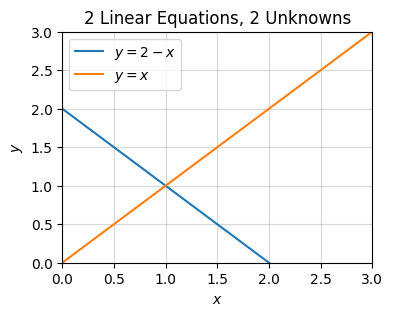

In [3]:
#| fig-align: center
#| code-fold: true
a, b, e = 1, 1, 2
c, d, f = 1, -1, 0
x = np.linspace(-3, 3, 100)
f0 = lambda x: -a / b * x + e / b
f1 = lambda x: -c / d * x + f / d
plot_function(x, [f0, f1], xlim=(0, 3), ylim=(0, 3), title='2 Linear Equations, 2 Unknowns',
              labels=[f'$y=2-x$', f'$y=x$'])

Suppose now you have a system of 2 equations with 3 unknowns $x$, $y$, and $z$. For example,

\begin{alignat*}{3}
   x & {}+{} &  y & {}+{} & z {}={} & 2  \\
   x & {}-{} &  y & {}+{} & z {}={} & 0.
\end{alignat*}

Does this system have a solution that satisfies both equations? Clearly it does. If we set $z=0$ then the original solution $x=y=1$ still works, so $x=1, y=1, z=0$ is a solution to this system. But is it the *only* solution? No, *any* solution of the form 

\begin{align*}
x=1-t, \\
y=1, \\
z=t.
\end{align*}

will work for *any* real number $t$. If you don't believe me, pick any choice of $t$ you want and plug it in, and it'll solve this system. Said differently, this system has *infinitely many solutions*.

This fact will be true for any system of 2 equations with 3 unknowns. The system is *underdetermined*, meaning it has too many variables to solve for. There will always be one that's *free*, in the sense that we can set it to be whatever we want.

Here's a plot of what this situation looks like. Since there are 3 variables the space is now 3-dimensional, so I'll have to use a 3D plot. Notice that now we don't have 2 intersecting *lines*, but 2 intersecting *planes*. Two planes intersect at a line, not a point. Any point on this line is a valid solution to this underdetermined linear system.

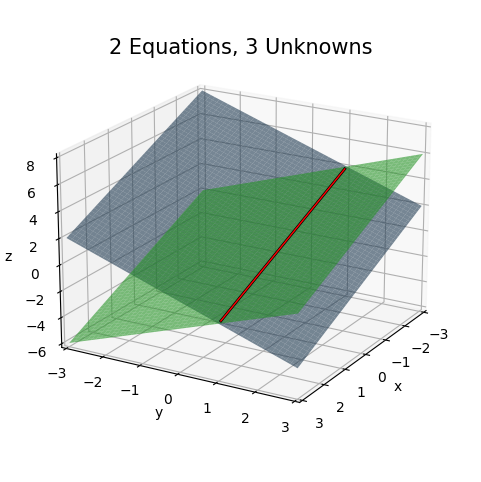

In [4]:
#| fig-align: center
#| code-fold: true
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
t = np.linspace(-1.9, 3.9, 100)
f1 = lambda x, y: 2 - x - y
f2 = lambda x, y: y - x
plot_function_3d(x, y, [f1, f2], azim=30, elev=20, ticks_every=[1, 1, 2], figsize=(6, 6), zorders=[0, 1], dist=11,
        colors=['steelblue', 'limegreen'], alpha=0.6, titlepad=-5, labelpad=2, title='2 Equations, 3 Unknowns',
        lines=[[1 - t, np.full(len(t), 1), t]])

Let's now step up to a system with 3 linear equations and 3 unknowns. For example, take the following,

\begin{alignat*}{5}
   3x & {}+{} &  2y & {}+{} & z {}={} & 0 \\
   x & {}+{} &  y & {}-{} & z {}={} & 1 \\
   x & {}-{} &  3y & {}-{} & z {}={} & -3.
\end{alignat*}

Again using substitution, you can iteratively solve each equation one by one to check that this system has exactly one solution when $x=-\frac{1}{2}$, $y=1$, and $z=-\frac{1}{2}$. 

To visualize what's going on here, again realize we're in 3 dimensions since there are 3 variables. Each equation in the system again defines a plane. Solving each for $z=f(x,y)$, the three planes are given by

\begin{align*}
z &= -3x - 2y + 0, \\
z &= x + y - 1, \\
z &= 4 .
\end{align*}

We can plot these planes and see if they intersect, and roughly where they intersect. It may be a little hard to visualize, but you should see the planes all intersect at a point, namely the red dot at $x=-\frac{1}{2}$, $y=1$, and $z=-\frac{1}{2}$.

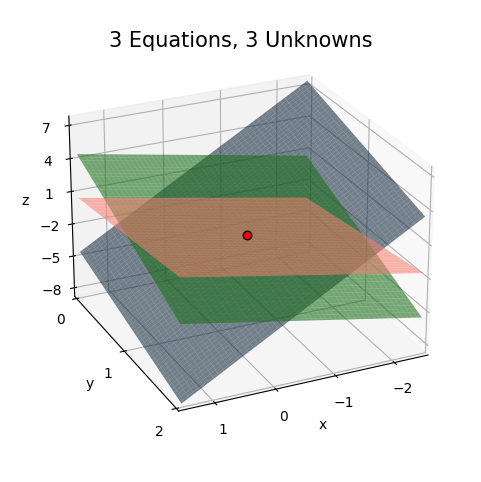

In [5]:
#| fig-align: center
#| code-fold: true
x = np.linspace(-2.5, 1.5, 100)
y = np.linspace(0, 2, 100)
f1 = lambda x, y: -3 * x - 2 * y + 0
f2 = lambda x, y: x + y - 1
f3 = lambda x, y: x - 3 * y + 3
plot_function_3d(x, y, [f1, f2, f3], azim=65, elev=25, ticks_every=[1, 1, 3], figsize=(6, 6), zorders=[0, 2, 1],
                 colors=['steelblue', 'salmon', 'limegreen'], points=[[-0.5, 1, -0.5]], alpha=0.6, labelpad=3, 
                 dist=11, title='3 Equations, 3 Unknowns')

Every linear system of 3 equations with 3 unknowns will look like this. The only time there won't be a solution is when any two planes are parallel to each other. Note now it only takes any two being parallel for there to be no solution, not all of them. 

If we like, we could again outright solve for the solutions of a general $3 \times 3$ linear system, but the solutions will look far more complex since there are now 12 coefficients $a, b, c, \cdots, k, l$,

\begin{alignat*}{5}
   ax & {}+{} &  by & {}+{} & cz {}={} & j \\
   dx & {}+{} &  ey & {}+{} & fz {}={} & k \\
   gx & {}+{} &  hy & {}+{} & iz {}={} & l.
\end{alignat*}

Here's what sympy gives as the solution to this system. Notice again that each term depends on the same denominator. When that denominator is zero the system won't have a solution.

In [6]:
#| code-fold: true
x, y, z = sp.symbols('x y z')
a, b, c, d, e, f, g, h, i, j, k, l = sp.symbols('a b c d e f g h i j k l')
eq1 = sp.Eq(a * x + b * y + c * z, j)
eq2 = sp.Eq(d * x + e * y + f * z, k)
eq3 = sp.Eq(g * x + h * y + i * z, l)
sol = sp.solve((eq1, eq2, eq3), (x, y, z))
print(f'x = {sol[x]}')
print(f'y = {sol[y]}')
print(f'z = {sol[z]}')

x = (b*f*l - b*i*k - c*e*l + c*h*k + e*i*j - f*h*j)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g)
y = (-a*f*l + a*i*k + c*d*l - c*g*k - d*i*j + f*g*j)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g)
z = (a*e*l - a*h*k - b*d*l + b*g*k + d*h*j - e*g*j)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g)


These denominators keep showing up for square-shaped systems like this. They're called **determinants**. In the $1 \times 1$ case $x=\frac{b}{a}$, so the determinant is just the denominator $D=a$. For the $2 \times 2$ system the determinant is $D = ad-bc$. For the $3 \times 3$ system it's a more complicated expression, but still just a polynomial function of all of the coefficients on the left-hand side,

$$D = aei - afh - bdi + bfg + cdh - ceg.$$

When $D \neq 0$ these kinds of linear systems evidently have unique solutions. When $D=0$ they have no solution at all since the denominators blow up. This is when two of the lines or planes are parallel to each other. This is a general pattern for any $n \times n$ linear system.

I could keep stepping up like this, going to 4 linear equations, 5 linear equations, etc. But you should start to see the idea by now. Suppose we have a system of $m$ linear equations with $n$ unknown variables $x_0, x_1, \cdots, x_{n-1}$,

$$
\begin{array}{c<{x_0} c c<{x_1} c c<{\cdots} c c<{x_{n-1}} c l}
a_{0,0}x_0 & + & a_{0,1}x_1 & + & \cdots & + & a_{0,n-1}x_{n-1} & = & b_0 \\
a_{1,0}x_0 & + & a_{1,1}x_1 & + & \cdots & + & a_{1,n-1}x_{n-1} & = & b_1 \\
\vdots    &   & \vdots    &   &  \ddots  &   & \quad \vdots    &   & \vdots\\
a_{m-1,0}x_0 & + & a_{m-1,1}x_1 & + & \cdots & + & a_{m-1,n-1}x_{n-1} & = & b_{m-1} \\
\end{array}.
$$

We can classify the solutions of an arbitrary $m \times n$ linear system as follows:

- If the linear system is *square*, i.e. $m=n$, then the system will have
    - A unique solution if the determinant is nonzero,
    - If the determinant *is* zero, the system will have
        - Infinitely many solutions if *all* the equations are multiples of each other,
        - No solution otherwise.
- If the linear system is *underdetermined*, i.e. $m < n$, then the system will have infinitely many solutions.
- If the linear system is *overdetermined*, i.e. $m > n$, then the system will have no solutions.   

Graphically, a unique solution means that the $n$ *hyperplanes* defined by the $n$ linear equations all intersect at a single point $(x_0, x_1, \cdots, x_n)$ in $\mathbb{R}^n$. Think of a hyperplane as an $n$-dimensional generalization of a plane. If any of two hyperplanes are parallel in $\mathbb{R}^n$, there will be no solution.

## Matrix-Vector Notation

These systems of linear equations are incredibly tedious to write out and analyze as is for all but the simplest cases of like two or three equations. There's a cleaner notation for working with these things. Here's what we can do. We have 3 separate types of objects showing up in these equations:

- The $m \cdot n$ coefficients $a_{0,0}, \ a_{0,1}, \ \cdots, \ a_{m-1,n-1}$.
- The $n$ unknown variables $x_0, x_1, \cdots, x_{n-1}$.
- The $m$ constant terms $b_0, b_1, \cdots, b_{m-1}$.

Let's put each of these three objects inside their own arrays and write the linear system as

$$
\begin{pmatrix}
a_{0,0} & a_{0,1} & \cdots & a_{0,n-1} \\
a_{1,0} & a_{1,1} & \cdots & a_{1,n-1} \\
\vdots  & \vdots  & \ddots & \vdots    \\
a_{m-1,0} & a_{m-1,1} & \cdots & a_{m-1,n-1}
\end{pmatrix}
\begin{pmatrix}
x_0 \\ x_1 \\ \vdots \\ x_{n-1}
\end{pmatrix} =
\begin{pmatrix}
b_0 \\ b_1 \\ \vdots \\ b_{m-1}
\end{pmatrix}.
$$

We'll *define* this notation to mean exactly the same thing as writing out the full system of linear equations. The array of coefficients is a rank-2 array of shape $(m,n)$. We'll call this an $m \times n$ **matrix**, denoted by a bold-face $\mathbf{A}$. The array of unknowns is a rank-2 array of shape $(n,1)$. Though technically also a matrix, we'll call an array of this shape a **column vector** of size $n$, denoted by a bold-face $\mathbf{x}$. The array of constants is also a rank-2 array of shape $(m,1)$. We'll call this a column vector of size $m$, denoted by a bold-face $\mathbf{b}$. In this sleek notation, our complicated system of $m$ linear equations with $n$ unknowns can be written

$$\mathbf{A} \mathbf{x} = \mathbf{b}.$$

For example, the 3 systems we considered above can be written in matrix-vector notation as

\begin{gather*}
\begin{alignedat}{3}
   x & {}+{} &  y & {}={} & 2  \\
   x & {}-{} &  y & {}={} & 0
\end{alignedat}
\quad \Longrightarrow \quad
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix} =
\begin{pmatrix}
2 \\
0
\end{pmatrix}.
\end{gather*}

\begin{gather*}
\begin{alignedat}{5}
   x & {}+{} &  y & {}+{} & z & {}={} & 2  \\
   x & {}-{} &  y & {}+{} & z & {}={} & 0
\end{alignedat}
\quad \Longrightarrow \quad
\begin{pmatrix}
1 & 1 & 1 \\
1 & -1 & 1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
z
\end{pmatrix} =
\begin{pmatrix}
2 \\
0 \\
\end{pmatrix}.
\end{gather*}

\begin{gather*}
\begin{alignedat}{2}
   x & {}={} & 2  \\
   x & {}={} & 0
\end{alignedat} 
\quad \Longrightarrow \quad
\begin{pmatrix}
1 \\
1
\end{pmatrix}
\begin{pmatrix}
x
\end{pmatrix} =
\begin{pmatrix}
2 \\
0
\end{pmatrix}.
\end{gather*}

It may not be at all obvious, but having written a linear system as a matrix-vector equation, I've implicitly defined a new kind of array multiplication. To see this, I'll define a new column vector that I'll call $\mathbf{A} \mathbf{x}$ whose elements are just the left-hand side of the linear system when written out,

$$
\mathbf{A} \mathbf{x} = 
\begin{pmatrix}
a_{0,0}x_0 & + & a_{0,1}x_1 & + & \cdots & + & a_{0,n-1}x_{n-1} \\
a_{1,0}x_0 & + & a_{1,1}x_1 & + & \cdots & + & a_{1,n-1}x_{n-1} \\
\vdots    &   & \vdots    &   &  \ddots  &   & \quad \vdots     \\
a_{m-1,0}x_0 & + & a_{m-1,1}x_1 & + & \cdots & + & a_{m-1,n-1}x_{n-1} \\
\end{pmatrix}.
$$

Setting the $i$<sup>th</sup> row of $\mathbf{A} \mathbf{x}$ equal to the $i$<sup>th</sup> row of $\mathbf{b}$ must imply that each $b_i$ can be written

$$b_i = a_{i,0}x_0 + a_{i,1}x_1 + \cdots + a_{i,n-1}x_{n-1} = \sum_{k=0}^{n-1} a_{i,k}x_k.$$

That is, each constant term $b_i$ is the sum of the products of the $i$<sup>th</sup> row of the matrix $\mathbf{A}$ with the vector $\mathbf{x}$. This is **matrix-vector multiplication**, a special case of matrix multiplication, which I'll get to shortly.

Here's a quick example, where a $2 \times 3$ matrix $\mathbf{A}$ is matrix multiplied with a size $3$ vector $\mathbf{x}$. For each row we're element-wise multiplying that row of $\mathbf{A}$ with the vector $\mathbf{x}$ and then summing up the terms. The output will be the vector $\mathbf{b}$ of size $2$.

$$
\mathbf{A} \mathbf{x} = 
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{pmatrix}
\begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix} = 
\begin{pmatrix}
1 \cdot 1 + 2 \cdot 1 + 3 \cdot 1 \\
4 \cdot 1 + 5 \cdot 1 + 6 \cdot 1 \\
\end{pmatrix} = 
\begin{pmatrix}
6 \\
15
\end{pmatrix} = \mathbf{b}.
$$

Here's a better way of thinking about what matrix-vector multiplication is. Notice that the $m \times n$ matrix $\mathbf{A}$ consists of $n$ columns each containing $m$ elements. We can think of each of these $n$ columns as a *vector* of size $m$. They're called the **column vectors** of $\mathbf{A}$. If $\mathbf{a}_0, \mathbf{a}_1, \cdots, \mathbf{a}_{n-1}$ are the $n$ column vectors of $\mathbf{A}$, we can write

$$
\mathbf{A}=
\begin{pmatrix}
\mathbf{a}_0 & \mathbf{a}_1 & \cdots & \mathbf{a}_{n-1}
\end{pmatrix}.
$$

In the previous example, the column vectors of $\mathbf{A}$ are the three size-2 vectors

$$\mathbf{a}_0 = \binom{1}{4}, \quad \mathbf{a}_1 = \binom{2}{5}, \quad \mathbf{a}_2 = \binom{3}{6}.$$

In this notation, matrix-vector multiplication is just a sum of the column vectors of $\mathbf{A}$, but with each column $\mathbf{a}_j$ weighted by some $x_j$,

$$
\mathbf{A} \mathbf{x} =
\begin{pmatrix}
\mathbf{a}_0 & \mathbf{a}_1 & \cdots & \mathbf{a}_{n-1}
\end{pmatrix}
\begin{pmatrix}
x_0 \\
x_1 \\
\cdots \\
x_{n-1}
\end{pmatrix} =
x_0 \mathbf{a}_0 + x_1 \mathbf{a}_1 + \cdots x_{n-1} \mathbf{a}_{n-1}.
$$

This weighted sum of vectors on the right-hand side is called a **linear combination**. A linear combination is a weighted sum of a bunch of vectors. That is, the matrix-vector product $\mathbf{A} \mathbf{x}$ is a linear combination of the column vectors of the matrix $\mathbf{A}$, weighted by the vector $\mathbf{x}$. In the above example, this would look like

$$
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{pmatrix}
\begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix} = 1 \cdot \binom{1}{4} + 1 \cdot \binom{2}{5} + 1 \cdot \binom{3}{6} = \binom{1+2+3}{4+5+6} = \binom{6}{15}.
$$

## Matrix Multiplication

While I'm on the topic, I'll go ahead and define **matrix multiplication** for two matrices $\mathbf{A}$ and $\mathbf{B}$ as well. If $\mathbf{A}$ is $m \times n$ and $\mathbf{B}$ is $n \times p$, define the matrix product $\mathbf{C}=\mathbf{A}\mathbf{B}$ as the $m \times p$ matrix $\mathbf{C}$ whose elements are given by

$$C_{i,j} = \sum_{k=0}^{n-1} A_{i,k} B_{k,j} = A_{i,0} B_{0,j} + A_{i,1} B_{1,j} + \cdots + A_{i,n-1} B_{n-1,j}.$$

Matrix multiplication is always expressed symbolically by directly concatenating the two matrix symbols next to each other like $\mathbf{A}\mathbf{B}$. We'd never use a multiplication symbol between them since those are often used to represent other kinds of multiplication schemes like element-wise multiplication or convolutions. Further, matrix multiplication is only defined when the numbers of *columns* in $\mathbf{A}$ equals the number of *rows* of $\mathbf{B}$. We say matrices satisfying this condition are **compatible**. If they can't be multiplied, they're called **incompatible**.

In words, matrix multiplication is the process where you take a *row* $i$ of the left matrix $\mathbf{A}$, element-wise multiply it with a *column* $j$ of the right matrix $\mathbf{B}$, and then sum up the results to get the entry $C_{i,j}$ of the output matrix $\mathbf{C}$. Doing this for all pairs of rows and columns will fill in $\mathbf{C}$.

Here's an example where $\mathbf{A}$ is $3 \times 3$ and $\mathbf{B}$ is $3 \times 2$. The output matrix $\mathbf{C}$ will be $3 \times 2$.

$$
\begin{pmatrix}
    \color{red}{1} & \color{red}{2} & \color{red}{3} \\
    \color{blue}{4} & \color{blue}{5} & \color{blue}{6} \\
    \color{green}{7} & \color{green}{8} & \color{green}{9} \\
\end{pmatrix}
\begin{pmatrix}
    \color{orange}{6} & \color{purple}{5} \\
    \color{orange}{4} & \color{purple}{3} \\
    \color{orange}{2} & \color{purple}{1} \\
\end{pmatrix} = 
\begin{pmatrix}
   \color{red}{1} \cdot \color{orange}{6} + \color{red}{2} \cdot \color{orange}{4} + \color{red}{3} \cdot \color{orange}{2} & \color{red}{1} \cdot \color{purple}{5} + \color{red}{2} \cdot \color{purple}{3} + \color{red}{3} \cdot \color{purple}{1} \\
   \color{blue}{4} \cdot \color{orange}{6} + \color{blue}{5} \cdot \color{orange}{4} + \color{blue}{6} \cdot \color{orange}{2} & \color{blue}{4} \cdot \color{purple}{5} + \color{blue}{5} \cdot \color{purple}{3} + \color{blue}{6} \cdot \color{purple}{1} \\
   \color{green}{7} \cdot \color{orange}{6} + \color{green}{8} \cdot \color{orange}{4} + \color{green}{9} \cdot \color{orange}{2} & \color{green}{7} \cdot \color{purple}{5} + \color{green}{8} \cdot \color{purple}{3} + \color{green}{9} \cdot \color{purple}{1} \\
\end{pmatrix} = 
\begin{pmatrix}
   20 & 14 \\
   56 & 41 \\
   92 & 68 \\
\end{pmatrix}.
$$

**Aside:** If you're still having a hard time picturing what matrix multiplication is doing, you may find [this](http://matrixmultiplication.xyz/) online visualization tool useful.

Note that matrix multiplication does not **commute**. That is, we can't swap the order of the two matrices being multiplied, $\mathbf{A}\mathbf{B} \neq \mathbf{B}\mathbf{A}$. Try to multiply the above example in the opposite order and see what happens. The two matrices won't even be compatible anymore. However, matrix multiplication is **associative**, which means you can group parentheses just like you ordinarily would. For example, multiplying three matrices $\mathbf{A}, \mathbf{B}, \mathbf{C}$ could be done by multiplying either the first two, and then the last; or the last two, and then the first. That is,

$$\mathbf{A}\mathbf{B}\mathbf{C} = \mathbf{A}(\mathbf{B}\mathbf{C}) = (\mathbf{A}\mathbf{B})\mathbf{C}.$$

Matrix multiplication can be thought of as a kind of extension to matrix-vector multiplication, where instead of just trying to solve one linear system, we're trying to solve a bunch of them in parallel, but all having the same coefficients $\mathbf{A}$. Suppose we want to simultaneously solve the systems of equations

$$\mathbf{A}\mathbf{x}_0=\mathbf{b}_0, \quad \mathbf{A}\mathbf{x}_1=\mathbf{b}_1, \quad \cdots, \quad \mathbf{A}\mathbf{x}_{p-1}=\mathbf{b}_{p-1}.$$

What we can do is create two matrices $\mathbf{X}$ and $\mathbf{B}$ by making column vectors out of each $\mathbf{x}_j$ and $\mathbf{b}_j$,

\begin{align*}
\mathbf{X} &=
\begin{pmatrix}
\mathbf{x}_0 & \mathbf{x}_1 & \cdots & \mathbf{x}_{n-1}
\end{pmatrix}, \\
\mathbf{B} &=
\begin{pmatrix}
\mathbf{b}_0 & \mathbf{b}_1 & \cdots & \mathbf{b}_{m-1}
\end{pmatrix}.
\end{align*}

Then the bunch of linear systems we're trying to solve is just the matrix product $\mathbf{A}\mathbf{X}=\mathbf{B}$. Each column $\mathbf{A}\mathbf{x}_j=\mathbf{b}_j$ can again be thought of as a linear combination of the columns of $\mathbf{A}$, but with each column weighted by its own vector $\mathbf{x}_j$.

### Matrix Multiplication Algorithm

Matrix multiplication is perhaps the single most important mathematical operation in machine learning. It's so important I'm going to write a function to code it from scratch before showing how to do it in numpy. I'll also analyze the speed of the algorithm in FLOPS and the memory in terms of word size. Algorithmically, all matrix multiplication is doing is looping over every single element of $\mathbf{C}$ and performing the sum-product calculation above for each $C_{i,j}$. Here's a function `matmul` that takes in two numpy arrays `A` and `B` and multiplies them, returning the product `C` if the dimensions are compatible.

In [7]:
def matmul(A, B):
    assert A.shape[1] == B.shape[0]
    m, n, p = A.shape[0], A.shape[1], B.shape[1]
    C = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]
    return C

In [8]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]); print(f'A = \n{A}')
B = np.array([[6, 5], [4, 3], [2, 1]]); print(f'B = \n{B}')
C = matmul(A, B); print(f'C = AB = \n{C.astype(A.dtype)}')

A = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
B = 
[[6 5]
 [4 3]
 [2 1]]
C = AB = 
[[20 14]
 [56 41]
 [92 68]]


Let's take a quick look at what this function is doing complexity wise. First off, we're pre-computing the output matrix $\mathbf{C}$. That'll contribute $O(mp)$ memory since $\mathbf{C}$ is $m \times p$. All of the FLOPS are happening inside the double loop over $m$ and $p$. For each $i,j$ pair, the function performing $n$ total multiplications and $n-1$ total additions, i.e. $2n-1$ FLOPs per $i,j$ pair. Since we're doing this $m \times p$ times, that gives $m \cdot p \cdot (2n-1)$ total FLOPS, or to leading order $O(mnp)$ FLOPS. Matrix multiplication is an example of a *cubic time* algorithm since if $n=m=p$ we'd have a cubic leading order of $O(n^3)$ FLOPS.

**Aside:** People have found algorithms that can matrix multiply somewhat faster than cubic time. For example, [Strassen's algorithm](https://en.wikipedia.org/wiki/Strassen_algorithm) can matrix multiply in about $O(n^{2.8})$ time. Matrices that have special forms, e.g. banded matrices or sparse matrices, have special algorithms that can multiply them even faster, for example by using the [Fast Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform). These special algorithms have their uses, but it remains the case that practically speaking most matrix multiplication is best done using the naive cubic time algorithm.

Cubic time may seem fast, but it's really not unless the matrices are relatively small (say $n \leq 1000$ or so). For this reason, a lot of effort has gone into making matrix multiplication run highly efficiently on hardware, mostly by parallelizing the function above, optimizing blocks to take advantage of meory, and compiling operations down to low-level C or FORTRAN code. In fact, it's no exaggeration to say that the entire reason the deep learning revolution over the past decade happened because people found ways to multiply matrices much faster by using GPUs.

Anyway, we'd never want to implement matrix multiplication natively in python like this. It's far too slow. In practice we'd use `np.matmul(A, B)` to matrix multiply. A cleaner notation is to use the special `@` symbol for matrix multiplication, in which case we can just write `A @ B`.

In [9]:
A @ B

array([[20, 14],
       [56, 41],
       [92, 68]])

### Multiplying Multiple Matrices

What about multiplying three or more matrices together. I already said matrix multiplication is associative, so we can multiply any two at a time we like and get the same answer. However, there are often computational advantages to multiplying them together in some particular sequence. For example, suppose we wanted to multiply $\mathbf{D} = \mathbf{A}\mathbf{B}\mathbf{C}$. Suppose, $\mathbf{A}$ is $m \times n$, $\mathbf{B}$ is $n \times p$, and $\mathbf{C}$ is $p \times q$. No matter which order we do it, the output $\mathbf{D}$ will have size $m \times q$. But there are two ways we could do this multiplication.

1. $\mathbf{D} = \mathbf{A}(\mathbf{B}\mathbf{C})$: In this case, the $\mathbf{E}=\mathbf{B}\mathbf{C}$ computation requires $nq(2p-1)$ FLOPS, and then the $\mathbf{A}\mathbf{E}$ computation requires $mq(2n-1)$ FLOPS. The total is thus the sum of these two, i.e.
$$nq(2p-1) + mq(2n-1) = O(npq+mnq) \ \ \text{FLOPS}.$$

2. $\mathbf{D} = (\mathbf{A}\mathbf{B})\mathbf{C}$: In this case, the $\mathbf{F}=\mathbf{A}\mathbf{B}$ computation requires $mp(2n-1)$ FLOPS, and then the $\mathbf{F}\mathbf{C}$ computation requires $mq(2n-1)$ FLOPS. The total is thus the sum of these two, i.e.
$$mq(2p-1) + mp(2n-1) = O(mpq+mnp) \ \ \text{FLOPS}.$$

Let's put some numbers in to make it clear what's going on. Suppose $m=1000$, $n=2$, $p=100$, and $q=100$. Then the first case takes

$$nq(2p-1) + mq(2n-1) = 339800 \ \ \text{FLOPS},$$

while the second case takes a staggering

$$mq(2p-1) + mp(2n-1) = 20200000 \ \ \text{FLOPS}.$$

It would thus behoove us in this case to multiply the matrices in the first order to save on computation, $\mathbf{D} = \mathbf{A}(\mathbf{B}\mathbf{C})$. Here's a programmatic way to see this.

In [10]:
m = 1000
n = 2
p = 100
q = 100

print(f'A(BC): {m * q * (2 * n - 1) + n * q * (2 * p - 1)} FLOPS')
print(f'(AB)C: {m * p * (2 * n - 1) + m * q * (2 * p - 1)} FLOPS')

A(BC): 339800 FLOPS
(AB)C: 20200000 FLOPS


The same issues extend to multiplying together arbitrarily many matrices. You can save *a lot* of compute by first taking time to find the optimal order to multiply them together before doing the computation. Don't just naively multiply them in order. Numpy has a function `np.linalg.multi_dot` that can do this for you. If you pass in a list of matrices, it'll multiply them together in the most efficient order to help save on computation. Here's an example. I'll profile the different ways we can do the $\mathbf{A}\mathbf{B}\mathbf{C}$ example above. Notice that indeed $\mathbf{A}(\mathbf{B}\mathbf{C})$ is much faster than $(\mathbf{A}\mathbf{B})\mathbf{C}$. The `multi_dot` solution is roughly as fast as the $\mathbf{A}(\mathbf{B}\mathbf{C})$ solution, but it does take slightly longer because it first calculates the optimal ordering, which adds a little bit of time.

In [11]:
A = np.random.rand(m, n)
B = np.random.rand(n, p)
C = np.random.rand(p, q)

In [12]:
%timeit A @ (B @ C)

65 µs ± 176 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
%timeit (A @ B) @ C

543 µs ± 31.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [14]:
%timeit np.linalg.multi_dot([A, B, C])

77.5 µs ± 384 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Matrix Multiplication vs Element-Wise Multiplication

We've already seen a different way we can multiply two matrices (or any array), namely element-wise multiplication. For matrices, element-wise multiplication is sometimes called the **Hadamard product**. I'll denote element-wise multiplication as $\mathbf{A} \circ \mathbf{B}$. It's only defined when the shapes of $\mathbf{A}$ and $\mathbf{B}$ are *equal* (or can be broadcasted to be equal).

It's important to mind the difference between matrix multiplication and element-wise multiplication of matrices. In general $\mathbf{A} \circ \mathbf{B} \neq \mathbf{A} \mathbf{B}$. They're defined completely differently,

$$
(A \circ B)_{i,j} = A_{i,j} \cdot B_{i,j} \\
(AB)_{i,j} = \sum_k A_{i,k}B_{k,j}.
$$

In numpy we'll use `A * B` for element-wise multiplication and `A @ B` for matrix multiplication. To make it clear the two kinds of multiplication aren't the same thing here's an example.

In [15]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 0], [0, 1]])
print(f'A*B = \n{A * B}')
print(f'AB = \n{A @ B}')

A*B = 
[[1 0]
 [0 4]]
AB = 
[[1 2]
 [3 4]]


## Solving Linear Systems

### Square Systems

We can use the idea of matrix multiplication to try to solve a linear system of equations. Suppose we have a system of $n$ linear equations with $n$ unknowns (it's important $m=n$ here),

$$
\begin{array}{c<{x_0} c c<{x_1} c c<{\cdots} c c<{x_{n-1}} c l}
a_{0,0}x_0 & + & a_{0,1}x_1 & + & \cdots & + & a_{0,n-1}x_{n-1} & = & b_0 \\
a_{1,0}x_0 & + & a_{1,1}x_1 & + & \cdots & + & a_{1,n-1}x_{n-1} & = & b_1 \\
\vdots    &   & \vdots    &   &  \ddots  &   & \quad \vdots    &   & \vdots\\
a_{m-1,0}x_0 & + & a_{m-1,1}x_1 & + & \cdots & + & a_{m-1,n-1}x_{n-1} & = & b_{m-1} \\
\end{array}.
$$

Written in matrix vector notation, we'd like to solve the equation $\mathbf{A}\mathbf{x} = \mathbf{b}$ for the vector $\mathbf{x}$. How do we go about this? Let's look at the simplest cases when $n=1,2$ and see if we can spot a pattern.

When $n=1$, we're just solving the single linear equation $ax=b$, where $a,x,b$ are all real numbers. In this case it's easy, as dividing both sides by $a$ gives $x = a^{-1}b$ when $a \neq 0$.

When $n=2$, we're solving the $2 \times 2$ linear system

\begin{alignat*}{3}
   ax & {}+{} &  by & {}={} & e \\
   cx & {}+{} &  dy & {}={} & f,
\end{alignat*}

which I showed before was given by

\begin{align*}
x &= \frac{de-bf}{ad-bc} \\
y &= \frac{af-ce}{ad-bc},
\end{align*}

provided $ad \neq bc$. Now, if I rewrite this equation in matrix-vector notation, I'd get

$$
\mathbf{A}\mathbf{x} = 
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix} =
\begin{pmatrix}
e \\
f
\end{pmatrix}
= \mathbf{b},
$$

and the solutions would look like

$$
\mathbf{x} = 
\begin{pmatrix}
x \\
y
\end{pmatrix} =
\begin{pmatrix}
\frac{de-bf}{ad-bc} \\
\frac{af-ce}{ad-bc}
\end{pmatrix} =
\begin{pmatrix}
\frac{d}{ad-bc} & -\frac{b}{ad-bc} \\
-\frac{c}{ad-bc} & \frac{a}{ad-bc}
\end{pmatrix}
\begin{pmatrix}
e \\
f
\end{pmatrix} =
\mathbf{A}^{-1} \mathbf{b}.
$$

The matrix on the right I'm calling $\mathbf{A}^{-1}$ because it looks something like the $x=a^{-1}b$ equation from the $n=1$ case. You can verify it gives the right result by matrix multiplying $\mathbf{A}^{-1}$ with $\mathbf{b}$ and confirming it does indeed give the equations for $\mathbf{x}$.

But what exactly does it mean to talk about "dividing by" a matrix? In the $n=1$ case, dividing by $a$ just means that $a a^{-1} = 1$. That is, the two values undo each other when multiplied together. Let's see what undoing a matrix would look like by matrix multiplying $\mathbf{A}\mathbf{A}^{-1}$ when $n=2$,

$$
\mathbf{A}\mathbf{A}^{-1} = 
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
\begin{pmatrix}
\frac{d}{ad-bc} & -\frac{b}{ad-bc} \\
-\frac{c}{ad-bc} & \frac{a}{ad-bc}
\end{pmatrix} = 
\begin{pmatrix}
\frac{ad}{ad-bc}-\frac{bc}{ad-bc} & -\frac{ab}{ad-bc}+\frac{ab}{ad-bc} \\
\frac{cd}{ad-bc}-\frac{dc}{ad-bc} & -\frac{cb}{ad-bc}+\frac{da}{ad-bc}
\end{pmatrix} = 
\begin{pmatrix}
\frac{ad-bc}{ad-bc} & \frac{ab-ab}{ad-bc} \\
\frac{cd-cd}{ad-bc} & \frac{ad-bc}{ad-bc}
\end{pmatrix} = 
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix} = \mathbf{I}.
$$

The matrix on the right $\mathbf{I}$ seems to behave kind of like the $1$ in the $a a^{-1} = 1$ case. This matrix is called the $2 \times 2$ **identity matrix**. The matrix $\mathbf{A}^{-1}$ is called the **inverse** of $\mathbf{A}$. The denominator $D=ad-bc$ is again the **determinant** of $\mathbf{A}$, usually denoted $\text{det}(\mathbf{A})$ or often more simply just $|\mathbf{A}|$ when the meaning is clear,

$$|\mathbf{A}| = \text{det}(\mathbf{A}) = ad - bc.$$

The inverse $\mathbf{A}^{-1}$ will only exist when $|\mathbf{A}| = ad-bc \neq 0$. If $\mathbf{A}^{-1}$ doesn't exist, neither does a solution to the linear system, since we can't solve for $\mathbf{x}$.

The exact same idea extends to arbitrary $n \times n$ systems as well. The $n \times n$ identity matrix $\mathbf{I}$ is the matrix whose values are $1$ when $i=j$ and $0$ when $i \neq j$. The terms in a matrix when $i=j$ are called the **diagonal** of the matrix. The terms when $i \neq j$ are called the **off-diagonals**. Thus, the identity matrix is the matrix that takes on the value $1$ on the diagonal and $0$ on the off-diagonals.

If we'd like to solve the system $\mathbf{A}\mathbf{x} = \mathbf{b}$, we could find the inverse of $\mathbf{A}$ somehow, and then get the solution $\mathbf{x}$ by writing $\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}$, provided its determinant $\text{det}(\mathbf{A}) \neq 0$. A matrix with non-zero determinant is called **invertible**. Invertible matrices have inverses. A matrix with zero determinant are called **singular**. Singular matrices can't be inverted.

Of course, it's no longer obvious at all how to even find $\mathbf{A}^{-1}$ or $\text{det}(\mathbf{A})$ when $n>2$. Thankfully we don't need to cover this for machine learning purposes. I'll just mention that there are efficient algorithms for solving large linear systems like this. You can use `np.linalg.solve(A, b)` to do this, provided $\mathbf{A}$ can be inverted. Here's an example of solving a $3 \times 3$ linear system. You can also get the inverse directly by using `np.linalg.inv(A)`, though you'd rarely actually want to do this. It turns out matrix inversion is a very numerically unstable operation. Try to avoid explicitly calculating matrix inverses if you can.

In [16]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]); print(f'A = \n{A}')
b = np.array([[1], [1], [1]]); print(f'b = \n{b}')
x = np.linalg.solve(A, b); print(f'x = \n{x}')

A = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
b = 
[[1]
 [1]
 [1]]
x = 
[[ 0.2]
 [-1.4]
 [ 1.2]]


### Rectangular Systems

What about when $m \neq n$? Things become more interesting then. If $m < n$ the linear system is under-determined, and will have infinitely many solutions. In this case, there are infinitely many ways to "invert" $\mathbf{A}$. We just need to find any one of them that will work. If $m > n$ the linear system is over-determined, and will have no exact solution. We can however find an *approximate* solution by looking for the $\mathbf{x}$ that most *nearly* solves the linear system. In both cases, a generalization of the inverse exists, called the **pseudoinverse**.

Here's how to find out what the pseudoinverse should be. Let's define a matrix similar to $\mathbf{A}$, but with its rows and columns swapped, called the **transpose** of $\mathbf{A}$. The transpose of $\mathbf{A}$, denoted by the symbol $\mathbf{A}^\top$, is defined by the relationship $A_{i,j}^\top = A_{j,i}$. For example, if $\mathbf{A}$ is the $3 \times 2$ matrix

$$
\mathbf{A} = 
\begin{pmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
\end{pmatrix}, \quad \text{then} \quad
\mathbf{A}^\top = 
\begin{pmatrix}
    1 & 4 \\
    2 & 5 \\
    3 & 6 \\
\end{pmatrix}
$$

is its transpose. The key thing to notice is that if $\mathbf{A}$ is $m \times n$, then $\mathbf{A}^\top$ is $n \times m$. This means that the *product* of the two is square since $\mathbf{A} \mathbf{A}^\top$ is $m \times m$. Note a **square** matrix is a matrix with the same number of rows as columns, i.e. with $m=n$. The product in the opposite order is square too since $\mathbf{A}^\top \mathbf{A}$ is $n \times n$. 

Here's an example. In numpy, we can use `np.transpose(A)`, or more simply `A.T` to get the transpose of a matrix. Notice both of the products $\mathbf{A} \mathbf{A}^\top$ and $\mathbf{A}^\top \mathbf{A}^\top$ are square, but each 

In [17]:
A = np.array([[1, 2, 3], [4, 5, 6]]); print(f'A = \n{A}')
At = A.T; print(f'At = \n{At}')
AAt = A @ At; print(f'A At = \n{AAt}')
AtA = At @ A; print(f'At A = \n{AtA}')

A = 
[[1 2 3]
 [4 5 6]]
At = 
[[1 4]
 [2 5]
 [3 6]]
A At = 
[[14 32]
 [32 77]]
At A = 
[[17 22 27]
 [22 29 36]
 [27 36 45]]


Now, suppose we want to solve an $m \times n$ linear system $\mathbf{A}\mathbf{x} = \mathbf{b}$, where $m \neq n$, i.e. $\mathbf{A}$ isn't square. A non-square matrix is called **rectangular**. We can't invert $\mathbf{A}$ since it isn't square. But what we *can* do is make the linear system square by multiplying both sides on the left by $\mathbf{A}^\top$,

$$\mathbf{A}^\top \mathbf{A}\mathbf{x} = \mathbf{A}^\top \mathbf{b}.$$

Since $\mathbf{A}^\top \mathbf{A}$ is square, it's invertible (provided it's non-singular). Thus, this modified linear system has a solution given by

$$\mathbf{x} = (\mathbf{A}^\top \mathbf{A})^{-1} \mathbf{A}^\top \mathbf{b}.$$

This looks kind of like $\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}$. If we define the **pseudoinverse** $\mathbf{A}^+$ by

$$\mathbf{A}^+ = (\mathbf{A}^\top \mathbf{A})^{-1} \mathbf{A}^\top,$$

then we could write the solution to this modified linear system as

$$\mathbf{x} = \mathbf{A}^+ \mathbf{b}.$$

The solution we get from this is called the **least squares solution** to $\mathbf{A}\mathbf{x} = \mathbf{b}$. It's the closest we can get to an exact solution in a certain sense. 

In numpy, you can use `np.linalg.lstsq` to solve such a system. It returns a tuple of values, the first of which is the least squares solution itself, i.e. $\mathbf{x}$. You can also get the pseudoinverse directly by using `np.linalg.pinv(A)`, though you'd rarely actually want to do this.

In the example below I'll take the same $2 \times 3$ matrix $\mathbf{A}$ from the transpose example, and $\mathbf{b}=\binom{1}{1}$. Since $m<n$, this is an under-determined system, so it'll have infinitely many solutions. The least squares solution will find *one* of these possible solutions, which turns out to be

$$
\mathbf{x} = 
\begin{pmatrix}
-\frac{1}{2} \\
0 \\
\frac{1}{2} \\
\end{pmatrix}.
$$

I'll also confirm that indeed $\mathbf{A}\mathbf{x}=\mathbf{b}$ in this case.

In [18]:
A = np.array([[1, 2, 3], [4, 5, 6]]); print(f'A = \n{A}')
b = np.array([1, 1]); print(f'b = \n{b}')
x, _, _, _ = np.linalg.lstsq(A, b, rcond=None); print(f'x = {x.round(2)}')
print(f'Ax = {A @ x}')

A = 
[[1 2 3]
 [4 5 6]]
b = 
[1 1]
x = [-0.5 -0.   0.5]
Ax = [1. 1.]
